<a href="https://colab.research.google.com/github/SatadruMukherjee/Data-Preprocessing-Models/blob/main/String_similarity_using_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Levenshtein Distance

The concept of **Levenshtein Distance** sometimes also called as **Minimum Edit distance** is a popular metric used to measure the distance between two strings. It is calculated by counting number of edits required to transform one string into another.

The edits could be one of the following:

Addition of a new letter.

Removal of a letter.

Substitution.

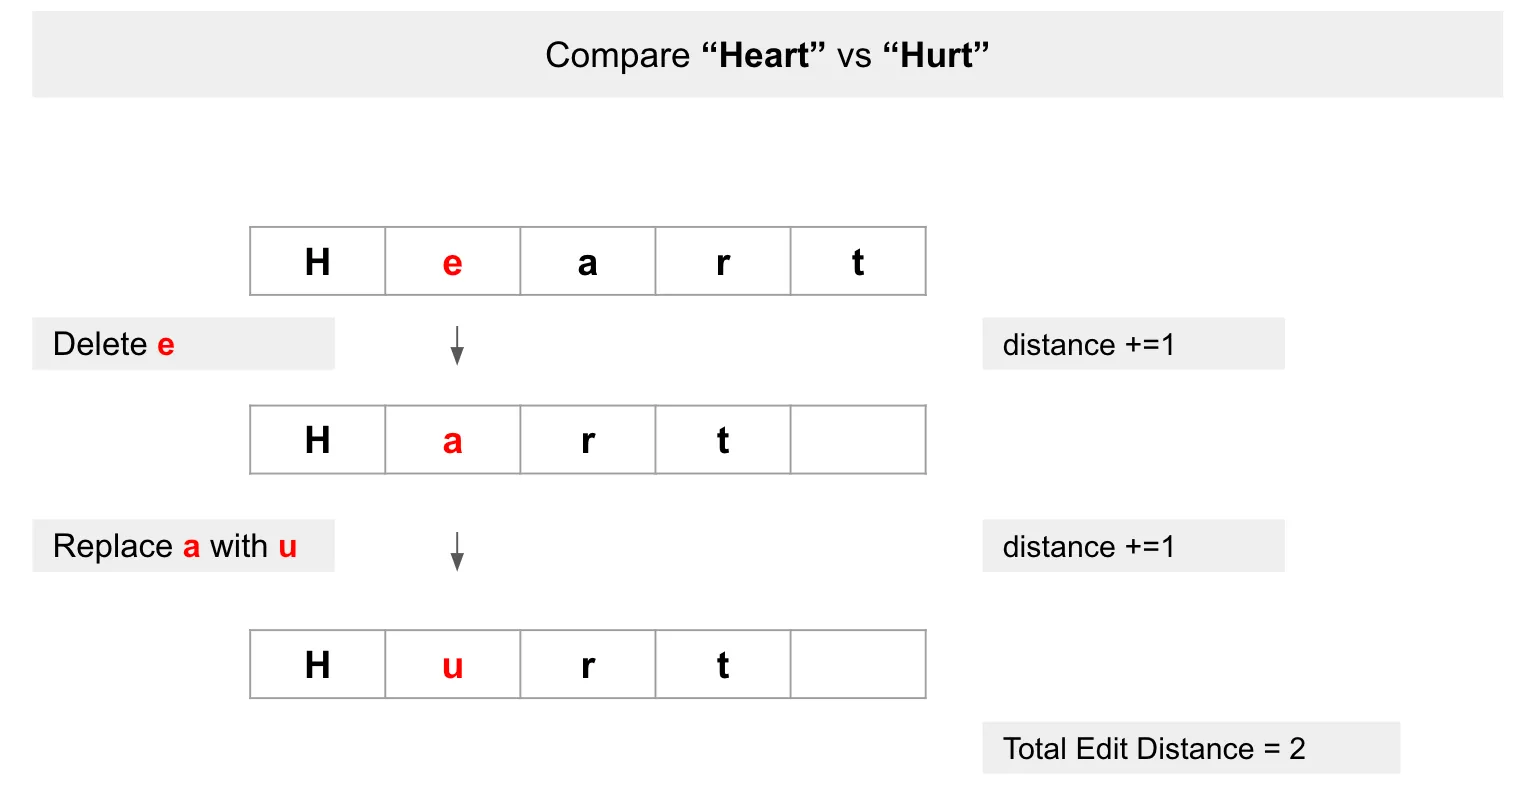

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
import pandas as pd

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
users = [
    {
        'favorite_cricketer': 'Virat Kohli',
        'favorite_snack': 'Chutney, Samosa',
        'favorite_city': 'Bangalore',
        'favorite_show': 'I love watching Two Brothers and a Girl on Zee TV'
    },
    {
        'favorite_cricketer': 'The Veerat Kohli',
        'favorite_snack': 'Samosha, Chutney',
        'favorite_city': 'Bengaluru',
        'favorite_show': 'I love love watching 2 brothers Two brothers and a girl on ZeeTV — love that show!'
    }
]

**Fuzz module's ratio function:** It expects two strings to compare. It returns the similarity of the sequencing of the strings (a value between 1 and 100)

In [ ]:
print(fuzz.ratio(users[0].get('favorite_cricketer'),
                 users[1].get('favorite_cricketer')))

print(fuzz.ratio(users[0].get('favorite_snack'),
                 users[1].get('favorite_snack')))

print(fuzz.ratio(users[0].get('favorite_city'),
                 users[1].get('favorite_city')))

print(fuzz.ratio(users[0].get('favorite_show'),
                 users[1].get('favorite_show')))

74
45
67
70


**Fuzz module's partial_ratio function:** It expects two strings to compare. It returns the similarity of the sequencing of the closest matching substrings (a value between 1 and 100).

In [ ]:
print(fuzz.partial_ratio(users[0].get('favorite_cricketer'),
                 users[1].get('favorite_cricketer')))

print(fuzz.partial_ratio(users[0].get('favorite_snack'),
                 users[1].get('favorite_snack')))

print(fuzz.partial_ratio(users[0].get('favorite_city'),
                 users[1].get('favorite_city')))

print(fuzz.partial_ratio(users[0].get('favorite_show'),
                 users[1].get('favorite_show')))

82
64
67
73


**Fuzz module's token_sort_ratio function:** It allows us to match strings despite word order. This is great for free-form survey data, where "I like dogs and cats" and "I like cats and dogs"

In [ ]:
print(fuzz.token_sort_ratio(users[0].get('favorite_cricketer'),
                 users[1].get('favorite_cricketer')))

print(fuzz.token_sort_ratio(users[0].get('favorite_snack'),
                 users[1].get('favorite_snack')))

print(fuzz.token_sort_ratio(users[0].get('favorite_show'),
                 users[1].get('favorite_show')))

74
97
75


**Fuzz module's token_set_ratio function:** Compares sets of the tokens

In [ ]:
print(fuzz.token_set_ratio(users[0].get('favorite_cricketer'),
                 users[1].get('favorite_cricketer')))

print(fuzz.token_set_ratio(users[0].get('favorite_snack'),
                 users[1].get('favorite_snack')))

print(fuzz.token_set_ratio(users[0].get('favorite_show'),
                 users[1].get('favorite_show')))

74
97
92


**Fuzz module's process function:** This is great if you have a limited amount of choices or options and messy data

In [ ]:
from fuzzywuzzy import process

choices = ['Yes', 'No', 'Maybe', 'N/A']

process.extract('ya', choices, limit=2)  #returns two possible matches from the list of choices we have declared in our choices variable.

[('Yes', 45), ('Maybe', 45)]

In [ ]:
process.extractOne('ya', choices) #return only the best match between our string and the list of available choices.

('Yes', 45)

In [ ]:
process.extract('nope', choices, limit=2)

[('No', 90), ('Yes', 29)]

In [ ]:
process.extractOne('nope', choices)

('No', 90)

# **Spelling Correction**

In [ ]:
# Create DataFrame with misspelled cities
df = pd.DataFrame({'city': ['Nw York', 'Sn Francisco', 'Chcago']})
print("Original Dataframe : ")
print(df)
print('\n')
# List of correct city names
correct_names = ['New York', 'San Francisco', 'Chicago']
# Correct misspellings using fuzzy matching
df['city'] = df['city'].apply(lambda x: process.extractOne(x, correct_names)[0])
print("Dataframe after spell correction: ")
print(df)

Original Dataframe : 
           city
0       Nw York
1  Sn Francisco
2        Chcago


Dataframe after spell correction: 
            city
0       New York
1  San Francisco
2        Chicago
